In [1]:
import seaborn as sns
from cryptory import Cryptory
import datetime
import matplotlib.pyplot as plt
import quandl
import urllib.request as urllib
import time
import numpy as np
import pandas as pd
from datetime import timedelta
import numpy as np

from_date="2013-04-28"
to_date="2018-09-23"
my_cryptory = Cryptory(from_date=from_date, to_date=to_date)
quandl.ApiConfig.api_key = "eJns-j8GmckFnApoFoAE"

def rename_columns(prepend_to_name, df):
    df.columns = [df.columns[0]]+ \
                [str(prepend_to_name)+i for i in df.columns[1:]]

In [2]:
# txs_data.head()
# avg_block_size.head()
# btc_google_trends.head()
# bch_accounts.head()
# bchain_mirev_data.head()

# bitcoin_market_info.head()
market_info=pd.read_csv('market_info.csv').iloc[:, 1:]
print(market_info)

      btc_Open  btc_High  btc_Low  btc_Close  btc_Volume  btc_Market Cap  \
0     0.342491  0.334338  6679.42   0.341871    0.176063        0.354311   
1     0.343507  0.336757  6616.80   0.342455    0.189156        0.355320   
2     0.332111  0.335746  6496.36   0.343123    0.273980        0.343536   
3     0.326184  0.322502  6395.95   0.332042    0.182380        0.337390   
4     0.324793  0.318465  6208.34   0.325808    0.185871        0.335918   
5     0.320107  0.315253  6265.71   0.324406    0.175333        0.331055   
6     0.332120  0.323049  6257.52   0.319768    0.164037        0.343400   
7     0.333286  0.323255  6460.10   0.331914    0.137316        0.344565   
8     0.331880  0.324124  6493.55   0.333253    0.134907        0.343083   
9     0.332190  0.325842  6456.17   0.331684    0.170976        0.343368   
10    0.323885  0.322809  6354.24   0.331921    0.176625        0.334779   
11    0.321967  0.314239  6265.09   0.323402    0.170473        0.332763   
12    0.3227

In [4]:
# market_info = bitcoin_market_info.merge(btc_google_trends, on='Date', how='inner'). \
#                     merge(avg_block_size, on='Date', how='inner'). \
#                     merge(txs_data, on='Date', how='inner'). \
#                     merge(bch_accounts, on='Date', how='inner'). \
#                     merge(s_and_p_stock, on='Date', how='inner'). \
#                     merge(dow_jones_stock, on='Date', how='inner') . \
#                     merge(bchain_mirev_data, on='Date', how='inner')

# # market_info = bitcoin_market_info.merge(btc_google_trends, on='Date', how='inner')

# # market_info = bitcoin_market_info


# market_info = market_info[market_info['Date']>='2014-01-01']
# # for coins in ['bt_']: 
# #     kwargs = { coins+'day_diff': lambda x: (x[coins+'Close']-x[coins+'Open'])/x[coins+'Open']}
# #     market_info = market_info.assign(**kwargs)
# market_info.head()
# # market_info.to_csv('market_info.csv')

In [233]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

accounts = go.Scatter(
                x=bch_accounts.Date,
                y=bch_accounts['btc_Accounts'],
                name = "Accounts",
                line = dict(color = '#6D13C1'),
                opacity = 0.8)

high = go.Scatter(
                x=bitcoin_market_info.Date,
                y=bitcoin_market_info['btc_High'],
                name = "High",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

low =go.Scatter(
                x=bitcoin_market_info.Date,
                y=bitcoin_market_info['btc_Low'],
                name = "Low",
                line = dict(color = '#7F7F7F'),
                opacity = 0.8)

block_size =go.Scatter(
                x=avg_block_size.Date,
                y=avg_block_size['btc_avg_block_size'],
                name = "Avg. blockcsize",
                line = dict(color = '#D8B1B1'),
                opacity = 0.8)

txs =go.Scatter(
                x=txs_data.Date,
                y=txs_data['btc_transactions'],
                name = "Nr of Transactions",
                line = dict(color = '#E125E8'),
                opacity = 0.8)

miner_revenue =go.Scatter(
                x=bchain_mirev_data.Date,
                y=bchain_mirev_data['btc_mining_revenue'],
                name = "Miners Revenue",
                line = dict(color = '#3D0A3F'),
                opacity = 0.8)

s_and_p =go.Scatter(
                x=s_and_p_stock.Date,
                y=s_and_p_stock['sp_close'],
                name = "S&P 500 Closing Price",
                line = dict(color = '#68340B'),
                opacity = 0.8)

dow_jones_stock =go.Scatter(
                x=dow_jones_stock.Date,
                y=dow_jones_stock['dj_close'],
                name = "Dow Jones Closing Price",
                line = dict(color = '#00E1FF'),
                opacity = 0.8)


data = [low, high, block_size, txs, accounts, s_and_p, dow_jones_stock, miner_revenue]

layout = dict(
    title = "Manually Set Date Range",
    xaxis = dict(
        range = ['2014-01-01','2018-09-23'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Manually Set Range")

## Long Short Term Memory (LSTM)

Like I said, if you're interested in the theory behind LSTMs, then I'll refer you to [this](http://colah.github.io/posts/2015-08-Understanding-LSTMs/), [this](http://blog.echen.me/2017/05/30/exploring-lstms/) and [this](http://www.bioinf.jku.at/publications/older/2604.pdf). Luckily, we don't need to build the network from scratch (or even understand it), there exists packages that include standard implementations of various deep learning algorithms (e.g. [TensorFlow](https://www.tensorflow.org/get_started/get_started), [Keras](https://keras.io/#keras-the-python-deep-learning-library), [PyTorch](http://pytorch.org/), etc.). I'll opt for Keras, as I find it the most intuitive for non-experts. If you're not familiar with Keras, then check out my [previous tutorial](https://dashee87.github.io/data%20science/deep%20learning/python/another-keras-tutorial-for-neural-network-beginners/).

In [153]:
model_data = market_info[['Date', 'sp_close', 'dj_close']+[coin+metric for coin in ['btc_'] 
                                   for metric in ['Open', 'High','Close','Volume', 'Market Cap', \
                                                  'google_trends_bitcoin',\
                                                  'avg_block_size', \
                                                  'transactions', \
                                                  'Accounts', \
                                                  'mining_revenue']]]

# model_data = market_info[['Date']+[coin+metric for coin in ['bt_'] 
#                                    for metric in ['Close','Volume', 'google_trends_bitcoin']]]

# model_data = market_info[['Date']+[coin+metric for coin in ['bt_'] 
#                                    for metric in ['Close','Volume']]]

# need to reverse the data frame so that subsequent rows represent later timepoints
model_data = model_data.sort_values(by='Date')
model_data.head()

,Date,sp_close,dj_close,btc_Open,btc_High,btc_Close,btc_Volume,btc_Market Cap,btc_google_trends_bitcoin,btc_avg_block_size,btc_transactions,btc_Accounts,btc_mining_revenue
1726,2014-01-01,0.202753,0.158649,0.035372,0.035014,0.036182,0.000943,0.025890,0.024518,0.026115,0.031834,0.077695,0.065017
1725,2014-01-02,0.190688,0.147451,0.036323,0.037261,0.037777,0.001614,0.026582,0.027865,0.026115,0.031834,0.096234,0.046764
1724,2014-01-03,0.190239,0.149821,0.037839,0.037952,0.038617,0.001586,0.027684,0.031213,0.119025,0.088241,0.117316,0.056611
1723,2014-01-04,0.190239,0.149821,0.038891,0.039219,0.040717,0.001594,0.028449,0.025633,0.119025,0.088241,0.096473,0.051999
1722,2014-01-05,0.190239,0.149821,0.040709,0.043860,0.044526,0.003058,0.029771,0.030097,0.088264,0.067895,0.099443,0.070736


In [154]:
market_info.head()
market_info.isnull().values.any()
market_info.to_csv('market_info.csv')

In [155]:
# from sklearn.preprocessing import minmax_scale, Imputer

# # model_data.fillna(model_data.mean(),inplace=True)

# mean_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

# btc_without_date = model_data.loc[:, model_data.columns != 'Date']

# # Train the imputor on the df dataset
# mean_imputer = mean_imputer.fit(btc_without_date)

# # Apply the imputer to the df dataset
# imputed_df = mean_imputer.transform(btc_without_date)

# # Get back columns
# imputed_df = pd.DataFrame(imputed_df, columns = btc_without_date.columns)

# imputed_df[['bt_Close','bt_Volume', 'sp_close', 'dj_close', 'bt_google_trends_bitcoin','bt_avg_block_size', \
#                                     'bt_mining_revenue', 'bt_transactions', 'bt_Accounts']] = \
#                 minmax_scale(imputed_df[['bt_Close', 'sp_close', 'dj_close', 'bt_Volume', \
#                                         'bt_mining_revenue', 'bt_google_trends_bitcoin','bt_avg_block_size', 'bt_transactions','bt_Accounts']])

# # imputed_df[['bt_Close','bt_Volume', 'bt_google_trends_bitcoin']] = \
# #         minmax_scale(imputed_df[['bt_Close','bt_Volume', 'bt_google_trends_bitcoin']])

# # imputed_df[['bt_Close','bt_Volume']] = \
# #         minmax_scale(imputed_df[['bt_Close','bt_Volume']])

# # Re add date column
# imputed_df['Date'] = model_data['Date']

# # Order by date
# imputed_df["Date"] = imputed_df["Date"].values[::-1]

# model_data=imputed_df
# # model_data.to_csv('model_data.csv')

In [156]:
model_data.head()

,Date,sp_close,dj_close,btc_Open,btc_High,btc_Close,btc_Volume,btc_Market Cap,btc_google_trends_bitcoin,btc_avg_block_size,btc_transactions,btc_Accounts,btc_mining_revenue
1726,2014-01-01,0.202753,0.158649,0.035372,0.035014,0.036182,0.000943,0.025890,0.024518,0.026115,0.031834,0.077695,0.065017
1725,2014-01-02,0.190688,0.147451,0.036323,0.037261,0.037777,0.001614,0.026582,0.027865,0.026115,0.031834,0.096234,0.046764
1724,2014-01-03,0.190239,0.149821,0.037839,0.037952,0.038617,0.001586,0.027684,0.031213,0.119025,0.088241,0.117316,0.056611
1723,2014-01-04,0.190239,0.149821,0.038891,0.039219,0.040717,0.001594,0.028449,0.025633,0.119025,0.088241,0.096473,0.051999
1722,2014-01-05,0.190239,0.149821,0.040709,0.043860,0.044526,0.003058,0.029771,0.030097,0.088264,0.067895,0.099443,0.070736


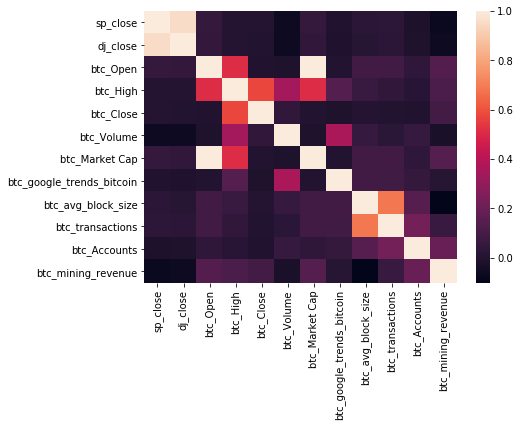

,sp_close,dj_close,btc_Open,btc_High,btc_Close,btc_Volume,btc_Market Cap,btc_google_trends_bitcoin,btc_avg_block_size,btc_transactions,btc_Accounts,btc_mining_revenue
sp_close,1,0.96,0.052,0.0053,0.0041,-0.063,0.051,-0.004,0.027,0.032,-0.015,-0.072
dj_close,0.96,1,0.046,0.0038,0.0015,-0.064,0.044,-0.0064,0.012,0.027,-0.014,-0.063
btc_Open,0.052,0.046,1,0.51,-0.002,-0.012,1,0.0018,0.09,0.091,0.036,0.14
btc_High,0.0053,0.0038,0.51,1,0.58,0.35,0.51,0.14,0.066,0.045,0.017,0.11
btc_Close,0.0041,0.0015,-0.002,0.58,1,0.042,-0.0013,-0.013,0.0063,0.0017,-0.0028,0.095
btc_Volume,-0.063,-0.064,-0.012,0.35,0.042,1,-0.012,0.36,0.054,0.021,0.056,-0.023
btc_Market Cap,0.051,0.044,1,0.51,-0.0013,-0.012,1,0.0022,0.09,0.091,0.036,0.14
btc_google_trends_bitcoin,-0.004,-0.0064,0.0018,0.14,-0.013,0.36,0.0022,1,0.091,0.087,0.051,0.012
btc_avg_block_size,0.027,0.012,0.09,0.066,0.0063,0.054,0.09,0.091,1,0.69,0.15,-0.1
btc_transactions,0.032,0.027,0.091,0.045,0.0017,0.021,0.091,0.087,0.69,1,0.22,0.064


In [38]:
# Pearson correlation on all attributes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

"""DROP DATE COLUMN!"""
all_features_df = model_data.loc[:, model_data.columns != 'Date']

# Percentage change => 
# first calculate: Increase = y_t - y_(t-1) then calculate: %Increace = (Increase-y_(t-1))*100
"""
    %Increase is used both to track the prices of individual securities and 
    of large market indexes, as well as comparing the values of different currencies.  
    Balance sheets with comparative financial statements will generally include the 
    prices of specific assets at different points in time along with the percentage 
    changes over the accompanying periods of time.  
"""
# Compute pairwise correlation of columns, excluding NA/null values

corr = all_features_df.pct_change().corr(method='pearson')
fig, ax = plt.subplots(figsize=(7,5))  
sns.heatmap(corr, 
            xticklabels=[col.replace("_price", "") for col in corr.columns.values],
            yticklabels=[col.replace("_price", "") for col in corr.columns.values],
            annot_kws={"size": 16})
plt.show()


# # Table view for readibility
# cmap=sns.diverging_palette(5, 250, as_cmap=True)
cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [157]:
split_date='2018-06-01'
# we don't need the date columns anymore
training_set, test_set = model_data[model_data['Date']<split_date], model_data[model_data['Date']>=split_date]
training_set = training_set.drop('Date', 1)
test_set = test_set.drop('Date', 1)

In [161]:
len(test_set.columns)

12

In [129]:
window_len = 65

LSTM_training_inputs = []
for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    LSTM_training_inputs.append(temp_set)   
    
# LSTM_training_inputs[0]

In [130]:
LSTM_test_inputs = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    LSTM_test_inputs.append(temp_set)
    
#     for col in norm_cols:
#         temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
#     LSTM_test_inputs.append(temp_set)

# LSTM_test_inputs = []
# for i in range(len(test_set)-window_len):
#     temp_set = test_set[i:(i+window_len)].copy()
#     LSTM_test_inputs.append(temp_set)
# LSTM_test_outputs = test_set['bt_Close'][window_len:].values
# LSTM_test_outputs = test_set['bt_Close'][window_len:].values-1

# print(LSTM_test_inputs[0])
LSTM_test_outputs = test_set['btc_Close'][window_len:].values
print(len(LSTM_test_outputs)) # predicting 45 points in the future

50


This table represents an example of our LSTM model input (we'll actually have hundreds of similar tables). We've normalised some columns so that their values are equal to 0 in the first time point, so we're aiming to predict changes in price relative to this timepoint. We're now ready to build the LSTM model. This is actually quite straightforward with Keras, you simply stack componenets on top of each other (better explained [here](https://dashee87.github.io/data%20science/deep%20learning/python/another-keras-tutorial-for-neural-network-beginners/)).

In [131]:
LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)

LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)

In [132]:
# import the relevant Keras modules
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, activ_func="tanh",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation("linear"))

    model.compile(loss=loss, optimizer=optimizer)
    return model


def gru_model(inputs, output_size, neurons, activ_func="tanh",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()

    model.add(GRU(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(0.15))  # Dropout overfitting

    # model.add(GRU(layers[2],activation='tanh', return_sequences=True))
    # model.add(Dropout(0.2))  # Dropout overfitting

    model.add(GRU(neurons, input_shape=(inputs.shape[1], inputs.shape[2]), 
                  activation='tanh', return_sequences=False))
    model.add(Dropout(0.15))  # Dropout overfitting

    model.add(Dense(output_dim=layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    # sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    # model.compile(loss="mse", optimizer=sgd)
    model.compile(loss="mse", optimizer="rmsprop") # Nadam rmsprop
    print ("Compilation Time : ", time.time() - start)
    return model 



def denser_model(inputs, output_size, neurons, activ_func='tanh', 
                 dropout=0.3, loss='mae', optimizer='adam'):
    """
    inputs: input data as numpy array
    output_size: number of predictions per input sample
    neurons: number of neurons/ units in the LSTM layer
    active_func: Activation function to be used in LSTM layers and Dense layer
    dropout: dropout ration, default is 0.25
    loss: loss function for calculating the gradient
    optimizer: type of optimizer to backpropagate the gradient
    This function will build 3 layered RNN model with LSTM cells with dropouts after each LSTM layer 
    and finally a dense layer to produce the output using keras' sequential model.
    Return: Keras sequential model and model summary
    """
    model = Sequential()
    model.add(LSTM(neurons, return_sequences=True, input_shape=(inputs.shape[1], inputs.shape[2]), activation=activ_func))
    model.add(Dropout(dropout))
    model.add(LSTM(neurons, return_sequences=True, activation=activ_func))
    model.add(Dropout(dropout))
    model.add(LSTM(neurons, activation=activ_func))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer, metrics=['mae'])
    model.summary()
    return model

In [133]:
# random seed for reproducibility
np.random.seed(202)

pred_range=60

# initialise model architecture
bt_model = build_model(LSTM_training_inputs, output_size=pred_range, neurons = 100)
# bt_model = denser_model(LSTM_training_inputs, output_size=pred_range, neurons = 100)

# model output is next 5 prices normalised to 10th previous closing price
LSTM_training_outputs = []

for i in range(window_len, len(training_set['btc_Close'])-pred_range):
    LSTM_training_outputs.append(training_set['btc_Close'][i:i+pred_range].values)
    
LSTM_training_outputs = np.array(LSTM_training_outputs)

# train model on data
bt_history = bt_model.fit(LSTM_training_inputs[:-pred_range], LSTM_training_outputs, 
                            epochs=50, batch_size=120, verbose=2, shuffle=True)

Epoch 1/50
 - 1s - loss: 0.0894
Epoch 2/50
 - 1s - loss: 0.0509
Epoch 3/50
 - 1s - loss: 0.0393
Epoch 4/50
 - 1s - loss: 0.0340
Epoch 5/50
 - 1s - loss: 0.0320
Epoch 6/50
 - 1s - loss: 0.0298
Epoch 7/50
 - 1s - loss: 0.0284
Epoch 8/50
 - 1s - loss: 0.0256
Epoch 9/50
 - 1s - loss: 0.0250
Epoch 10/50
 - 1s - loss: 0.0235
Epoch 11/50
 - 1s - loss: 0.0227
Epoch 12/50
 - 1s - loss: 0.0256
Epoch 13/50
 - 1s - loss: 0.0238
Epoch 14/50
 - 1s - loss: 0.0222
Epoch 15/50
 - 1s - loss: 0.0207
Epoch 16/50
 - 1s - loss: 0.0208
Epoch 17/50
 - 1s - loss: 0.0222
Epoch 18/50
 - 1s - loss: 0.0205
Epoch 19/50
 - 1s - loss: 0.0200
Epoch 20/50
 - 1s - loss: 0.0197
Epoch 21/50
 - 1s - loss: 0.0194
Epoch 22/50
 - 1s - loss: 0.0188
Epoch 23/50
 - 1s - loss: 0.0186
Epoch 24/50
 - 1s - loss: 0.0186
Epoch 25/50
 - 1s - loss: 0.0187
Epoch 26/50
 - 1s - loss: 0.0192
Epoch 27/50
 - 1s - loss: 0.0182
Epoch 28/50
 - 1s - loss: 0.0196
Epoch 29/50
 - 1s - loss: 0.0190
Epoch 30/50
 - 1s - loss: 0.0178
Epoch 31/50
 - 1s -

In [138]:
print(training_data.columns)

NameError: name 'training_data' is not defined

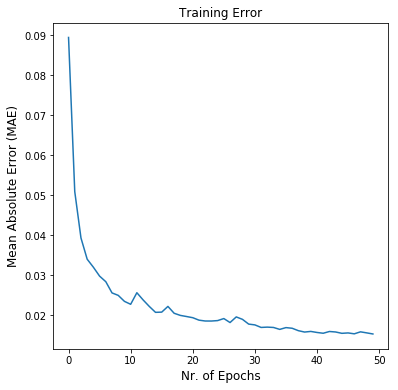

In [134]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 6

# fig.clear()
fig, ax1 = plt.subplots(1,1)

ax1.plot(bt_history.epoch, bt_history.history['loss'])
ax1.set_title('Training Error')

if bt_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
# just in case you decided to change the model loss calculation
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('Nr. of Epochs',fontsize=12)
plt.show()

In [70]:
# params = 4 * ((len(LSTM_training_inputs[:-pred_range]) + 1) * len(LSTM_training_outputs) +  len(LSTM_training_outputs)^2)

# # 4 * (4097 * 256 + 256^2) = 4457472
# print(params)

# 4 * 100 * (len(LSTM_training_inputs[:-pred_range]) + 1 + len(LSTM_training_outputs))

# LSTM_training_inputs, output_size=pred_range, neurons = 100

# model.add(LSTM(units=256, input_dim=4096, input_length=16))

# [(256 + 4096 + 1) * 256] * 4 = 4457472
# units=100
# input_dim=len(LSTM_training_inputs[:-pred_range])
# input_length=12
              
# p = ((units+input_dim+1)*units)*4
              

# The entities W , U and V are shared by all steps of the RNN and these are the only parameters in the model described in the figure. Hence number of parameters to be learnt while training = dim(W)+dim(V)+dim(U).

# Based on data in the question this = n2+kn+nm.

# where,

# n - dimension of hidden layer - 100 
# k - dimension of output layer - 30 
# m - dimension of input layer - 1611


d=100^2 + 30*100 + 100*1611
d
print(LSTM_training_inputs.shape)

(1611, 35, 12)


In [135]:
import sklearn.metrics

# From History though: 
print("From Training History: " + str(np.mean(bt_history.history['loss'])) )

a=bt_model.predict(LSTM_training_inputs[:-pred_range])

print( "Scikit: " + str(sklearn.metrics.mean_absolute_error(LSTM_training_outputs, bt_model.predict(LSTM_training_inputs[:-pred_range]))))

print('Mean from Prediction: %.4f'%np.mean(np.abs((bt_model.predict(LSTM_training_inputs[:-pred_range]))-\
            (LSTM_training_outputs))))

# print('MAE: %.4f'%np.mean(np.abs((bt_model.predict(LSTM_test_inputs[:-pred_range]))-\
#             (LSTM_training_outputs))))
print(bt_history.history.keys())

From Training History: 0.022134024318465468
Scikit: 0.012774064370912675
Mean from Prediction: 0.0128
dict_keys(['loss'])


In [136]:
import plotly.plotly as py
import plotly.graph_objs as go

mae_test_error =sklearn.metrics.mean_absolute_error(LSTM_training_outputs, bt_model.predict(LSTM_training_inputs[:-pred_range]))

# Create a trace
real_price = go.Scatter(
    x = model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
    y = training_set['btc_Close'][window_len:]+1,
    name = "Real Price",
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)'
    )
)

predicted_price = go.Scatter(
    x = model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
    y = ((np.transpose(bt_model.predict(LSTM_training_inputs))+1))[0], 
    name = "Predicted Price",
    marker = dict(
        size = 10,
        color = "#82E0AA"
    )
)

layout = dict(title = 'Training Set Prediction, MAE: %.4f'%+ mae_test_error,
              yaxis = dict(title = 'Bitcoin Price (USD)'),
            )

data = [real_price,predicted_price]

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='bitcoin-prediction')

In [137]:
import plotly.plotly as py
import plotly.graph_objs as go

mae_test_error =np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs)))-\
            (test_set['btc_Close'].values[window_len:])))
# Create a trace
real_price = go.Scatter(
    x = model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
    y = test_set['btc_Close'][window_len:],
    name = "Real Price",
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)'
    )
)

predicted_price = go.Scatter(
    x = model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
    y = ((np.transpose(bt_model.predict(LSTM_test_inputs)))[0]), 
    name = "Predicted Price",
    marker = dict(
        size = 10,
        color = "#82E0AA"
    )
)

layout = dict(title = 'Test Set Prediction (Batch Size=200), MAE: %.4f'%+ mae_test_error,
              yaxis = dict(title = 'Bitcoin Price (USD)')
            )

data = [real_price,predicted_price]

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='bitcoin-prediction')

In [54]:
"""
    
    EVALUATING ON TEST SET; MAE: 0.0301

"""

test_outputs=[]

for i in range(window_len, len(test_set['btc_Close'])-pred_range):
    test_outputs.append(test_set['btc_Close'][i:i+pred_range].values)

a = len(test_set['btc_Close'])-pred_range
print(a)
test_outputs = np.array(test_outputs)
    
print(bt_model.evaluate(LSTM_test_inputs[:-pred_range], test_outputs, batch_size=200))




# # loss: 0.030180492639249445
# # loss with google: 0.03131183715485244

# """
    
#     EVALUATING ON TRAINING SET; MAE: 0.0301

# """

print(bt_model.evaluate(LSTM_training_inputs[:-pred_range], LSTM_training_outputs, batch_size=200))  

# # loss: 0.004505583531820338
# # loss with google: 0.005251145405104876 

51
16/16 [==============================] - 0s 7ms/step
0.05152176693081856
1581/1581 [==============================] - 0s 86us/step
0.012556687791482472


In [55]:
# bt_model
bt_model.summary()
bt_model.save('bt_model_dense.h5')
# bt_model.layers 
# # List of input tensors:
# bt_model.inputs
# bt_model.outputs
bt_model.get_weights()
bt_model.save_weights('bt_model_weights') 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               45200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
activation_1 (Activation)    (None, 30)                0         
Total params: 48,230
Trainable params: 48,230
Non-trainable params: 0
_________________________________________________________________


In [72]:
# from keras.utils import plot_model
# plot_model(bt_model, to_file='model.png')
bt_model = build_model(LSTM_training_inputs, output_size=pred_range, neurons = 100)

def build_model(inputs, output_size, neurons, activ_func="tanh",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()
    model.add(LSTM(256, input_dim=4096, input_length=16))
   
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation("linear"))

    model.compile(loss=loss, optimizer=optimizer)
    return model

# inputs, output_size, neurons,

# model.add(LSTM(256, input_dim=4096, input_length=16))

# model.add(LSTM(256, input_dim=4096, input_length=16))
# model.summary()
# 4 * (4097 * 256 + 256^2) = 4457472
# 4 * ((input_dim+1) + neurons + neurons^2)

4 * ((1) * 100 + 100^2)

645208

In [74]:
LSTM_training_inputs.shape[1] # 35
LSTM_training_inputs.shape[2] # 12

params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)


12

In [75]:
36 + 100 + 100^2

238

In [76]:
238*4

952

In [90]:
4*((360 + 1) * 100 + 100^2)
# 45200

144808

In [86]:
# 4 * (4097 * 256 + 256^2) = 4457472
# 4097 input_dim
128*35

4480

In [89]:
30*12

360

In [94]:
4*(len(LSTM_training_inputs) + 1 * 100 + 100 ^ 2)

7236

In [101]:
# 4(nm+n2+n)
# input vectors of size m
# giving output vectors of size n
4*(1050*100 + 100^2 + 100)

420776

In [98]:
30*35


1050